In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Cadenas radioactivas

## Decaimiento simple

\begin{equation}
N_1 \xrightarrow{\lambda_1} N_2 (estable)
\end{equation}

Vimos que las soluciones eran:

\begin{align}
N_1(t) &= N(0) e^{-\lambda_1 t} \\
N_2(t) &= N(0)\left( 1 - e^{-\lambda_1 t} \right)
\end{align}

In [16]:
# Soluciones del problema
lambda_1 = 1.
N0 = 10
def N1(t):
    return N0*np.exp(-lambda_1*t)
def N2(t):
    """ N2 = 1 - N1"""
    return N0 - N1(t)
t = np.arange(0, 10, 0.001)

<IPython.core.display.Javascript object>


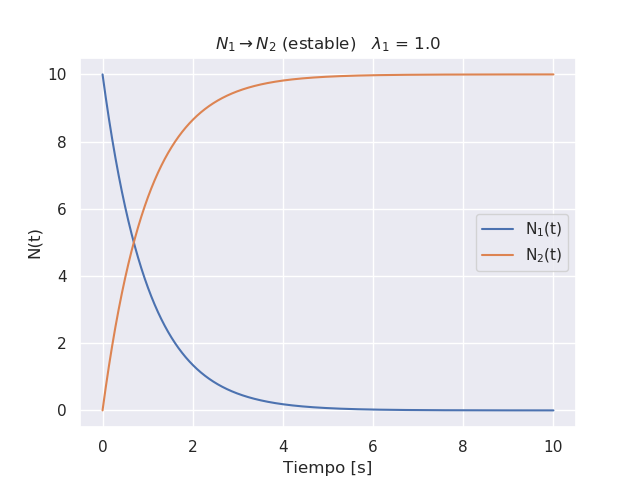

In [17]:
# Graficación
fig, ax = plt.subplots(1,1)
ax.plot(t, N1(t), label=r'N$_1$(t)')
ax.plot(t, N2(t), label='N$_2$(t)')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'N(t)')
ax.legend()
title_str = r"$N_1 \rightarrow N_2$ (estable)   $\lambda_1$ = {}".format(lambda_1)
ax.set_title(title_str);

---

## Cadena radioactiva con fuente

\begin{align}
N_0 & \xrightarrow{\lambda_0} N_1 (estable) \\
\uparrow & \\
S(t) &
\end{align}

In [18]:
S=10
lambda_0 = 2
def A0(t, Ain):
    return Ain* np.exp(-lambda_0 * t) + S*(1-np.exp(-lambda_0*t))

<IPython.core.display.Javascript object>


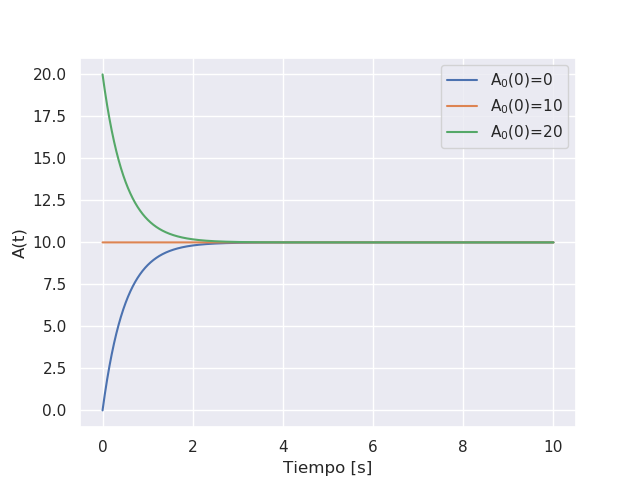

In [19]:
# Graficación
fig, ax = plt.subplots(1,1)
ax.plot(t, A0(t, 0), label=r'A$_0$(0)=0')
ax.plot(t, A0(t, 10), label=r'A$_0$(0)=10')
ax.plot(t, A0(t, 20), label=r'A$_0$(0)=20')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'A(t)')
ax.legend();

## Relaciones de equilibrio entre madre e hija

\begin{equation}
N_1 \xrightarrow{\lambda_1} N_2 \xrightarrow{\lambda_2} N_3 (estable)
\end{equation}

Se escribien las soluciones asumiendo que $A_2(0)=A_3(0)=0$

In [20]:
# Actividad inicial de la madre
A1_0 = 5
# Constantes de decaimiento
lambda_1 = 1.2
lambda_2 = 1
# Actividad de la madre
def A1(t, ):
    return A1_0*np.exp(-lambda_1*t)
# Actividad de la hija
def A2(t):
    fac = lambda_2 / (lambda_2 - lambda_1) * A1_0
    return fac* (np.exp(-lambda_1*t) - np.exp(-lambda_2*t))
# Tiempo donde se produce la máxima actividad de la hija
tmax = 1/(lambda_1-lambda_2) * np.log(lambda_1 / lambda_2)
# Vector temporal
t = np.arange(0, 8, 0.001)

<IPython.core.display.Javascript object>


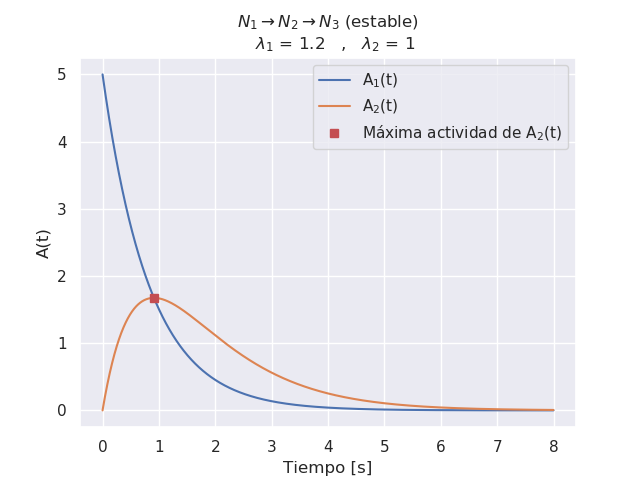

In [21]:
# Graficación
fig, ax = plt.subplots(1,1)
ax.plot(t, A1(t), label=r'A$_1$(t)')
ax.plot(t, A2(t), label='A$_2$(t)')
ax.plot(tmax, A1(tmax), 'rs', label=r'Máxima actividad de A$_2$(t)')
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel(r'A(t)')
ax.legend()
title_str = r"$N_1 \rightarrow N_2 \rightarrow N_3$ (estable)" + '\n'
title_str += "   $\lambda_1$ = {}   ,   $\lambda_2$ = {}".format(lambda_1, lambda_2)
ax.set_title(title_str);

### Relaciones aproximadas entre madre e hija

 * Equilibrio secular ($\lambda_1 << \lambda_2$)
 * Equilibrio transitorio ($\lambda_1 < \lambda_2$)
 * No equilibrio ($\lambda_1 > \lambda_2$)

In [22]:
# Actividad inicial de la madre
A1_0 = 5
# Actividad de la madre
def A1(t, lam):
    return A1_0*np.exp(-lam*t)
# Actividad de la hija
def A2(t, lam1, lam2):
    fac = lam2 / (lam2 - lam1) * A1_0
    return fac* (np.exp(-lam1*t) - np.exp(-lam2*t))

# Vector temporal
t = np.arange(0, 8, 0.001)

In [23]:
# %matplotlib inline
from ipywidgets import interact, FloatSlider, Layout

#Función que se ejecutará dinámicamente
def intemp(t1, t2, tmax):
    #S = lambda t: S1(t,Sc,tI,tP-tI)
    lam1 = 1 / t1
    lam2 = 1 / t2
    #sol = odeint(actividad, A0, t, args=(l, S),rtol=1e-14,atol=1e-13)
    t = np.linspace(0, tmax, 200)
        
    fig, ax = plt.subplots()
    # fig, ax = plt.subplots(figsize=(15.0,7.5))

    ax.plot(t, A1(t, lam1), 'b', label=r'$A_1(t)$',lw=2.5)
    ax.plot(t,A2(t, lam1, lam2), 'r',label='$A_2(t)$')

    ax.set_xlabel('Tiempo',fontsize=15)
    ax.set_ylabel('Actividad(t)',fontsize=15)
    ax.grid(True)
    ax.set_xlim(0, tmax)
    ax.legend(bbox_to_anchor=(1.01, 1.0),fontsize=15,loc=2)
    fig.canvas.draw()
    
# Definición de los controles
t1_widget = FloatSlider(min=0,max=10000,step=1,value=10000,continuous_update=False,
                         description=r'$\tau_1$',layout=Layout(width='50%', height='50px'))

t2_widget = FloatSlider(min=0, max=1000,step=1,value=1,continuous_update=False,
                         description=r'$\tau_2$',layout=Layout(width='50%', height='50px'))    

tmax_widget = FloatSlider(min=0, max=100000,step=10,value=10,continuous_update=False,
                         description=r'$t_{max}$',layout=Layout(width='50%', height='50px'))  

   
interact(intemp,t1=t1_widget,  t2=t2_widget, tmax=tmax_widget);